In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!git clone https://github.com/lazyprogrammer/machine_learning_examples.git

fatal: destination path 'machine_learning_examples' already exists and is not an empty directory.


In [3]:
df = pd.read_csv("/content/machine_learning_examples/tf2.0/moore.csv", header=None).values

In [4]:
df

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [5]:
X = df[:, 0].reshape(-1, 1)
Y = df[:, 1].reshape(-1, 1)

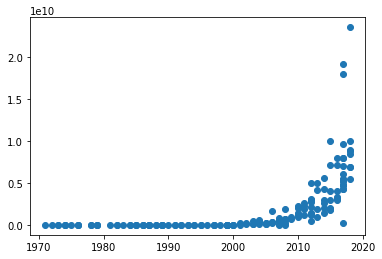

In [6]:
plt.scatter(X, Y)

In [7]:
mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()

X = (X-mx)/sx

Y = (Y-my)/sy

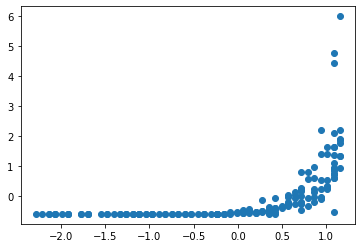

In [8]:
plt.scatter(X, Y)

In [9]:
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [10]:
model = nn.Linear(1, 1)

In [11]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

In [12]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [13]:
type(inputs)

torch.Tensor

In [14]:
n_epochs=100
Losses = []
for i in range(n_epochs):
  optimizer.zero_grad()
  #Froward propagation
  outputs = model(inputs)

  loss=criterion(outputs, targets)
  Losses.append(loss.item())
  #Back Propagation
  loss.backward()
  optimizer.step()

  print(f"Epochs {i+1}/{n_epochs}, Loss: {loss.item():.4f}")


Epochs 1/100, Loss: 1.1948
Epochs 2/100, Loss: 1.1740
Epochs 3/100, Loss: 1.1400
Epochs 4/100, Loss: 1.0987
Epochs 5/100, Loss: 1.0544
Epochs 6/100, Loss: 1.0102
Epochs 7/100, Loss: 0.9680
Epochs 8/100, Loss: 0.9288
Epochs 9/100, Loss: 0.8933
Epochs 10/100, Loss: 0.8615
Epochs 11/100, Loss: 0.8336
Epochs 12/100, Loss: 0.8092
Epochs 13/100, Loss: 0.7880
Epochs 14/100, Loss: 0.7698
Epochs 15/100, Loss: 0.7542
Epochs 16/100, Loss: 0.7409
Epochs 17/100, Loss: 0.7296
Epochs 18/100, Loss: 0.7200
Epochs 19/100, Loss: 0.7119
Epochs 20/100, Loss: 0.7051
Epochs 21/100, Loss: 0.6993
Epochs 22/100, Loss: 0.6944
Epochs 23/100, Loss: 0.6903
Epochs 24/100, Loss: 0.6869
Epochs 25/100, Loss: 0.6840
Epochs 26/100, Loss: 0.6816
Epochs 27/100, Loss: 0.6795
Epochs 28/100, Loss: 0.6778
Epochs 29/100, Loss: 0.6764
Epochs 30/100, Loss: 0.6752
Epochs 31/100, Loss: 0.6742
Epochs 32/100, Loss: 0.6734
Epochs 33/100, Loss: 0.6726
Epochs 34/100, Loss: 0.6721
Epochs 35/100, Loss: 0.6716
Epochs 36/100, Loss: 0.6711
E

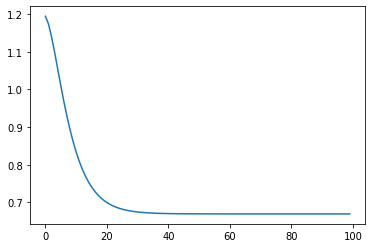

In [15]:
plt.plot(Losses)

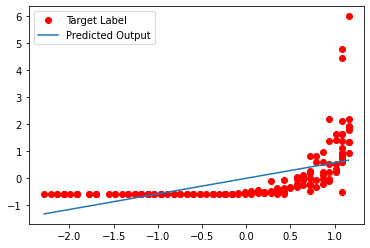

In [20]:
predicted = model(inputs).detach().numpy()

plt.plot(X, Y, "ro", label="Target Label")
plt.plot(X, predicted, label = "Predicted Output")
plt.legend()
plt.show()

In [22]:
weights = model.weight.data.numpy()

In [23]:
weights

array([[0.57525444]], dtype=float32)

In [24]:
print(weights[0])


[0.57525444]


In [25]:
a = weights[0] * (sy/sx)

In [26]:
print(a)

[1.5145688e+08]
